In [30]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [31]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


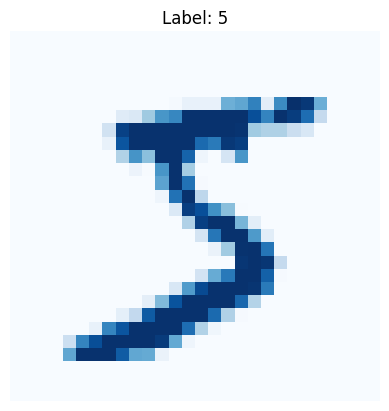

In [32]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='Blues')
plt.title("Label: " + str(y_train[0]))
plt.axis('off')
plt.show()

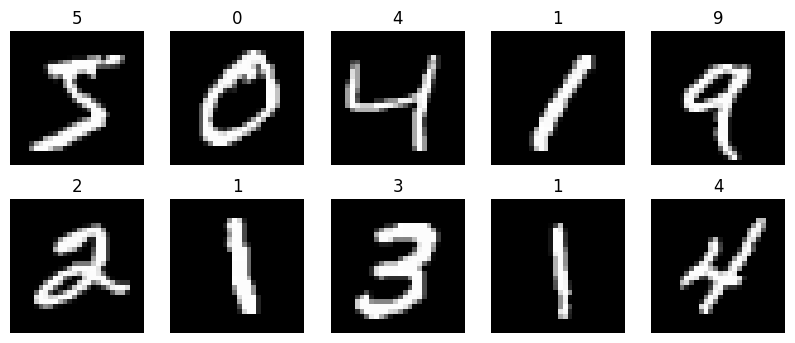

In [33]:
plt.figure(figsize=(10,4))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(str(y_train[i]))
    plt.axis('off')

plt.show()

In [34]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [35]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print("New training shape:", X_train.shape)
print("New testing shape:", X_test.shape)

New training shape: (60000, 28, 28, 1)
New testing shape: (10000, 28, 28, 1)


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

model = Sequential()

model.add(Input(shape=(28,28,1)))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [38]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [39]:
history = model.fit(
    X_train,
    y_train,
    epochs=5,
    validation_data=(X_test, y_test)
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.9085 - loss: 0.3055 - val_accuracy: 0.9773 - val_loss: 0.0684
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9839 - loss: 0.0513 - val_accuracy: 0.9829 - val_loss: 0.0469
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9910 - loss: 0.0311 - val_accuracy: 0.9854 - val_loss: 0.0457
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9939 - loss: 0.0206 - val_accuracy: 0.9857 - val_loss: 0.0459
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 23ms/step - accuracy: 0.9959 - loss: 0.0130 - val_accuracy: 0.9871 - val_loss: 0.0395


In [40]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9840 - loss: 0.0501
Test Accuracy: 0.9871000051498413


In [41]:
import numpy as np

predictions = model.predict(X_test[:5])

predicted_digits = np.argmax(predictions, axis=1)

print("Predicted:", predicted_digits)
print("Actual:   ", y_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Predicted: [7 2 1 0 4]
Actual:    [7 2 1 0 4]


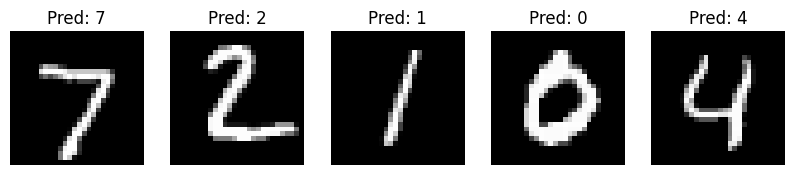

In [42]:
plt.figure(figsize=(10,4))

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Pred: {predicted_digits[i]}")
    plt.axis('off')

plt.show()